# Linear Regression, Lasso Regression, Ridge Regression 2012-2014 UK Car Accident Data

### Basic Library Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

In [4]:
# loading data
df = pd.read_csv('2012-2014cd.csv')
df.head()

,Unnamed: 0,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,mult_casualties
0,0,3,2,1,5,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,1,0
1,1,3,2,1,4,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,1,0
2,2,3,2,1,3,One way street,30,Daylight: Street light present,Fine without high winds,Dry,1,0
3,3,3,1,1,4,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,1,0
4,4,3,1,1,3,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,1,0


In [5]:
# checking size
df.shape

(464697, 12)

### Data Cleaning

In [6]:
# removing empty first column
df. drop('Unnamed: 0',axis=1,inplace=True,)

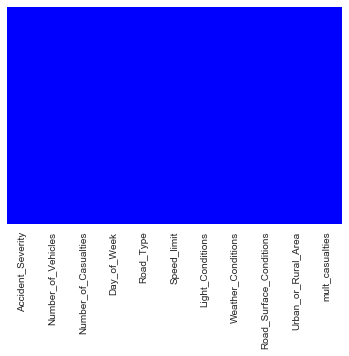

In [7]:
# checking for nulls
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='winter')

### Feature Engineering

(0, 10)

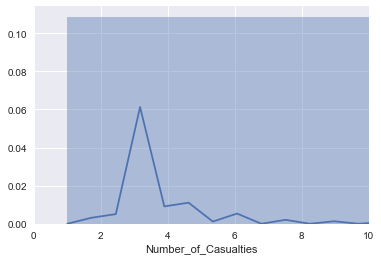

In [17]:
# check out the target variable
sns.distplot(df['Number_of_Casualties'],bins=10)
plt.xlim(0,10)

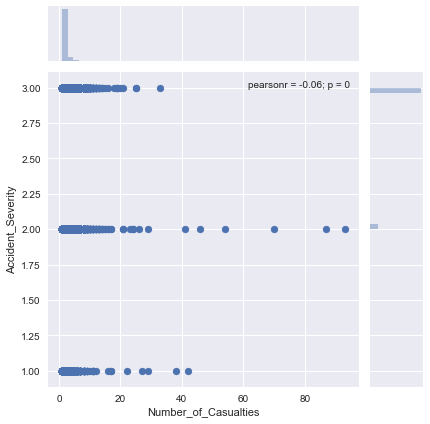

In [11]:
# deaths v severity
sns.jointplot(x='Number_of_Casualties',y= 'Accident_Severity',data=df)

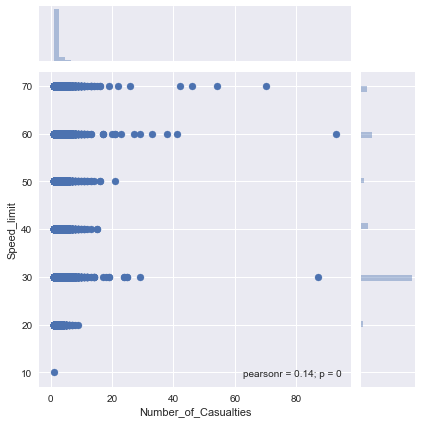

In [12]:
# deaths v speed limit
sns.jointplot(x='Number_of_Casualties',y= 'Speed_limit',data=df)

After looking at the casualties column we can see that the majority of accidents  have one to three casualties so we will use this to set the column to a binary variable

In [19]:
#setting up data frame
features = pd.DataFrame()

In [20]:
# filling data frame with dummies 
features = pd.get_dummies(df)

In [21]:
# checking all columns
features.columns

Index(['Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Day_of_Week', 'Speed_limit', 'Urban_or_Rural_Area', 'mult_casualties',
       'Road_Type_Dual carriageway', 'Road_Type_One way street',
       'Road_Type_Roundabout', 'Road_Type_Single carriageway',
       'Road_Type_Slip road', 'Road_Type_Unknown',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present',
       'Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Condit

In [22]:
# fitting X with our features
X = features.drop(features[['mult_casualties','Number_of_Casualties']],axis=1)

In [23]:
# fitting Y for prediction
Y = features['mult_casualties']

In [43]:
# Importing Sklearn Libraries
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE

## Fitting Model With Train Data

In [25]:
# splitting data in to groups
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [15]:
# calling model
lr = LogisticRegression()

In [68]:
# calling Lasso model
lasso = Lasso(alpha=.1)

In [69]:
lassfit = lasso.fit(X_train,Y_train)

In [27]:
# calling Ridge model
rid = RidgeClassifier(alpha=.85)

In [22]:
# cross validating, 30 feature Logistic Regression model, over 6 folds
cross_val_score(lr.fit(X_train,Y_train), X, Y, cv=6)

array([ 0.78442866,  0.77928986,  0.78277598,  0.78148201,  0.78383194,
        0.7820243 ])

In [19]:
# saving model predictions
y_pred = lr.predict(X_test)

In [21]:
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.98      0.87    108354
          1       0.55      0.10      0.17     31056

avg / total       0.74      0.78      0.72    139410



### Logistic Regression All Features Results

Looking at our model we see that is between 77-78% accurate. It looks like it is slightly over fitting. Lets see if ridged or lasso regression can improve the model

In [70]:
print(lasso.score(X_train, Y_train))

0.0242102352285


In [72]:
# cross validating, 30 feature Logistic Regression model, over 6 folds
cross_val_score(lasso.fit(X_train, Y_train), X, Y, cv=6)

array([ 0.02152381,  0.01802056,  0.02486636,  0.0248388 ,  0.02086338,
        0.02571255])

In [30]:
# cross validating, 30 feature Logistic Regression model, over 6 folds
cross_val_score(rid.fit(X_train,Y_train), X, Y, cv=6)

array([ 0.78232408,  0.78207876,  0.78241446,  0.78205012,  0.78215342,
        0.78292812])

In [31]:
# saving model predictions
y_pred = rid.predict(X_test)

In [32]:
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.99      0.88    108354
          1       0.59      0.06      0.11     31056

avg / total       0.74      0.78      0.71    139410



### Lasso and Ridge Regression All Feature Results

After running the same data with lasso regression we can see that lasso regression is not a very good fit for this data it is having major accuracy errors.  On the other hand the ridge model is about the same as our original model but it is slightly more consistant

## RFE

In [33]:
nfeatures = 4

In [34]:
# setting up selector
rfe = RFE(lr,nfeatures)

In [35]:
# fitting rfe
fit = rfe.fit(X,Y)

In [23]:
result_RFE = pd.DataFrame(list(X.head(0)))
result_RFE.head(10)

,0
0,Accident_Severity
1,Number_of_Vehicles
2,Day_of_Week
3,Speed_limit
4,Urban_or_Rural_Area
5,Road_Type_Dual carriageway
6,Road_Type_One way street
7,Road_Type_Roundabout
8,Road_Type_Single carriageway
9,Road_Type_Slip road


In [36]:
# creating new dataframe with 5 best features
small_feature = pd.DataFrame()

In [39]:
# filling data frame
small_feature = features[['Accident_Severity', 'Number_of_Vehicles','Day_of_Week', 'Speed_limit', 'Urban_or_Rural_Area' ]]

In [40]:
# fitting new x
X = small_feature

In [41]:
# spliting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [42]:
# fitting logistical regression model
logreg = lr.fit(X_train,Y_train)

In [43]:
# new scores
cross_val_score(lr.fit(X_train,Y_train), X, Y, cv=6)

array([ 0.78445449,  0.7794448 ,  0.7834603 ,  0.78190809,  0.78379321,
        0.78186936])

In [51]:
# saving model predictions
y_pred = lr.predict(X_test)

In [52]:
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.97      0.88    108678
          1       0.54      0.11      0.18     30732

avg / total       0.74      0.78      0.72    139410



In [48]:
# new scores
cross_val_score(las.fit(X_train,Y_train), X, Y, cv=6)

array([ 0.07746825,  0.07629652,  0.0824464 ,  0.07701352,  0.07490235,
        0.08428831])

In [49]:
# new scores
cross_val_score(rid.fit(X_train,Y_train), X, Y, cv=6)

array([ 0.78225952,  0.78160103,  0.78255649,  0.78238583,  0.78238583,
        0.78314762])

In [46]:
# saving model predictions
y_pred = rid.predict(X_test)

In [47]:
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.99      0.88    108678
          1       0.59      0.06      0.12     30732

avg / total       0.75      0.78      0.71    139410



###   Analysis for 5 feature models

Dropping the number of features in our model didn't have much affect on the first model but it did help us improve our ridged model even further.  Lets go one step farther and apply PCA to take the best of these 5 features and reduce our data to 2 components

## Applying PCA to Small Feature Set

In [53]:
# standardizing data
ss = StandardScaler().fit_transform(X_train)

In [57]:
# using pca to select 2 components from our 5 remaining features
sklearn_pca = PCA(n_components=2)

# fitting our x training data to pca
Y_sklearn = sklearn_pca.fit_transform(ss)

# adding results to a new data frame
X_PCA = pd.DataFrame(Y_sklearn)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.34136789  0.2160511 ]


In [58]:
# logistic regression model with 2 components 6 fold score
cross_val_score(lr.fit(X_PCA,Y_train), X, Y, cv=6)

array([ 0.78445449,  0.7794448 ,  0.7834603 ,  0.78190809,  0.78379321,
        0.78186936])

In [59]:
# Lasso regression model with 2 components 6 fold score
cross_val_score(las.fit(X_PCA,Y_train), X, Y, cv=6)

array([ 0.07746825,  0.07629652,  0.0824464 ,  0.07701352,  0.07490235,
        0.08428831])

In [60]:
# Ridge regression model with 2 components 6 fold score
cross_val_score(rid.fit(X_PCA,Y_train), X, Y, cv=6)

array([ 0.78225952,  0.78160103,  0.78255649,  0.78238583,  0.78238583,
        0.78314762])

### Model Anaysis

Using PCA didn't have much affect on the accuracy or our models but it does improve our efficients

## Conclusion
I think that for this dataset the ridge regression model preformed the best.  It was able to match the logistical regression model accuracy while improving on its consistency.  I think it was able to do this by reducing the coeff of features that were highly corrilated.  